In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


**Librairies**

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
import matplotlib.pyplot as plt

**Reading data**

In [3]:
train_df = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")
test_df = pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")

In [4]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
train_df.shape

(7613, 5)

In [6]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [7]:
test_df.shape

(3263, 4)

## Exploratory Data Analysis

### Missing values

<AxesSubplot:>

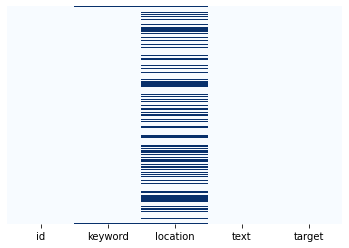

In [8]:
sns.heatmap(train_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

### Histogramm of target

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'target'}>]], dtype=object)

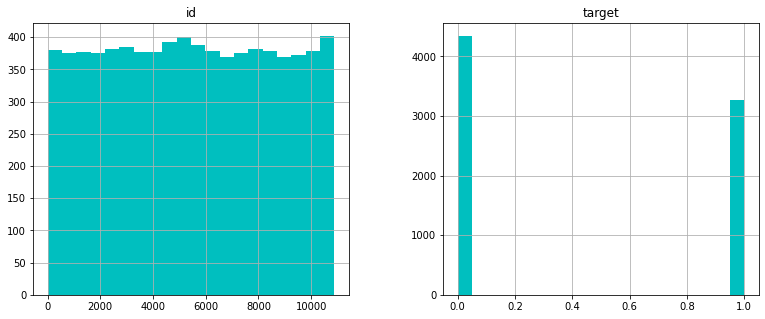

In [9]:
train_df.hist(bins = 20, figsize = (13,5), color = 'c')

### Class balance

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='target', ylabel='count'>

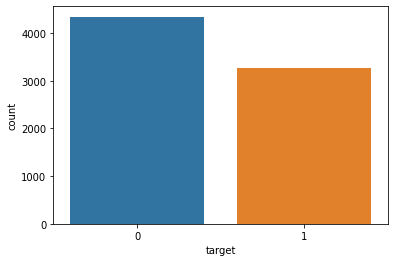

In [10]:
sns.countplot(train_df['target'], label = "Count") 

In [11]:
# Let's get the length of the messages
train_df['length'] = train_df['text'].apply(len)
train_df.head()

,id,keyword,location,text,target,length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


In [12]:
train_df.describe()

,id,target,length
count,7613.000000,7613.00000,7613.000000
mean,5441.934848,0.42966,101.037436
std,3137.116090,0.49506,33.781325
min,1.000000,0.00000,7.000000
25%,2734.000000,0.00000,78.000000
50%,5408.000000,0.00000,107.000000
75%,8146.000000,1.00000,133.000000
max,10873.000000,1.00000,157.000000


<AxesSubplot:ylabel='Frequency'>

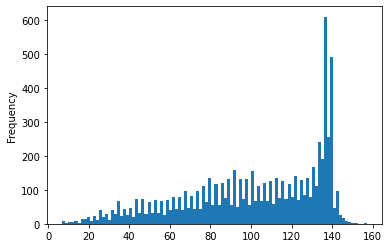

In [13]:
# Plot the histogram of the length column
train_df['length'].plot(bins=100, kind='hist') 

### Plot the wordcloud

In [14]:
positive = train_df[train_df['target']==0]
positive

,id,keyword,location,text,target,length
15,23,NaN,NaN,What's up man?,0,14
16,24,NaN,NaN,I love fruits,0,13
17,25,NaN,NaN,Summer is lovely,0,16
18,26,NaN,NaN,My car is so fast,0,17
19,28,NaN,NaN,What a goooooooaaaaaal!!!!!!,0,28
...,...,...,...,...,...,...
7581,10833,wrecked,Lincoln,@engineshed Great atmosphere at the British Li...,0,104
7582,10834,wrecked,NaN,Cramer: Iger's 3 words that wrecked Disney's s...,0,80
7584,10837,NaN,NaN,These boxes are ready to explode! Exploding Ki...,0,127
7587,10841,NaN,NaN,Sirens everywhere!,0,18


In [15]:
sentences_pos = positive['text'].tolist()
len(sentences_pos)

4342

In [16]:
sentences_pos_as_one_string =" ".join(sentences_pos)

In [17]:
!pip install wordcloud

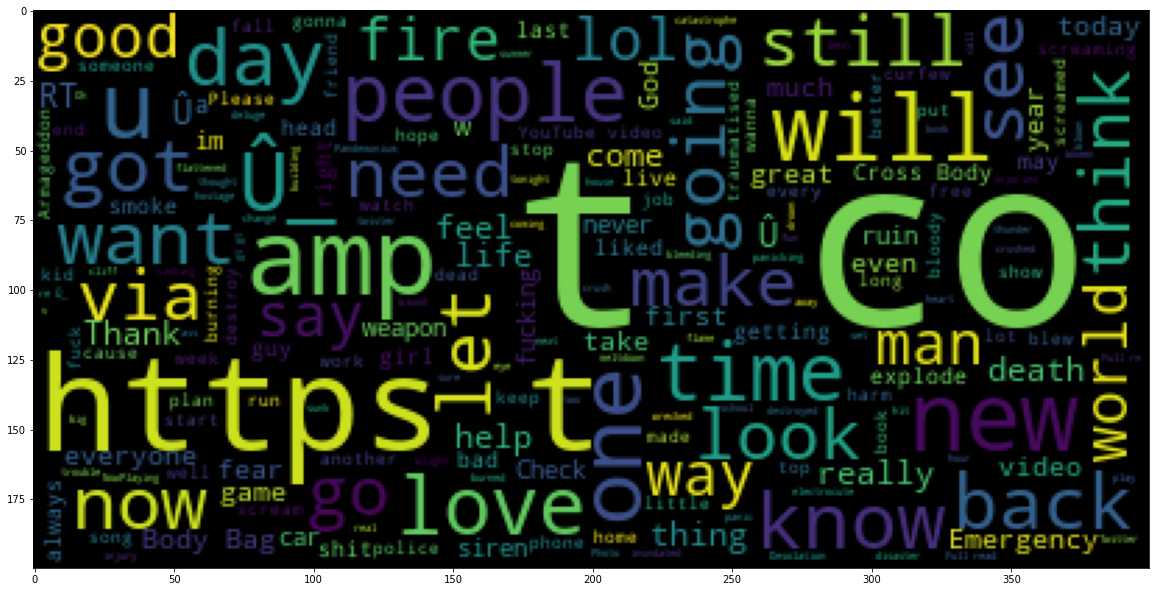

In [18]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_pos_as_one_string))

In [19]:
negative = train_df[train_df['target']==1]
negative

,id,keyword,location,text,target,length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,137


In [20]:
sentences_neg = negative['text'].tolist()
len(sentences_neg)

3271

In [21]:
sentences_neg_as_one_string =" ".join(sentences_neg)

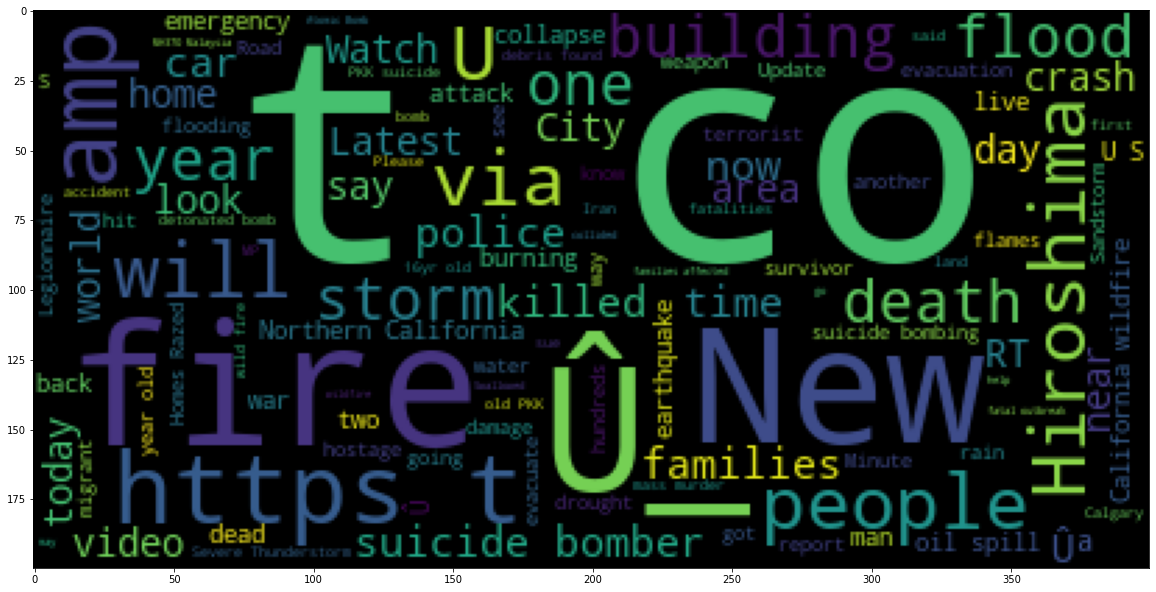

In [22]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_neg_as_one_string))

### Most common words

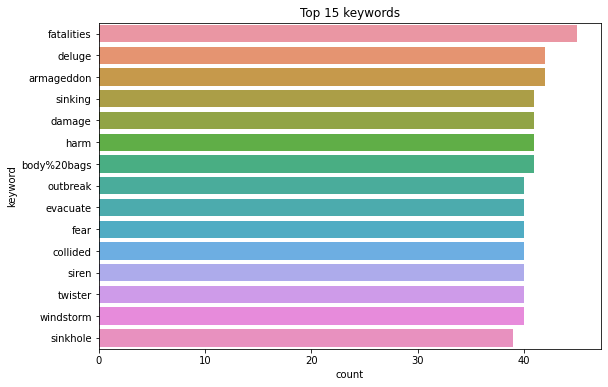

In [23]:
plt.figure(figsize=(9,6))
sns.countplot(y=train_df.keyword, order = train_df.keyword.value_counts().iloc[:15].index)
plt.title('Top 15 keywords')
plt.show()

### Most common words of target == 0

In [24]:
train_df_val_0 = train_df[train_df['target']==0]
train_df_val_1 = train_df[train_df['target']==1]

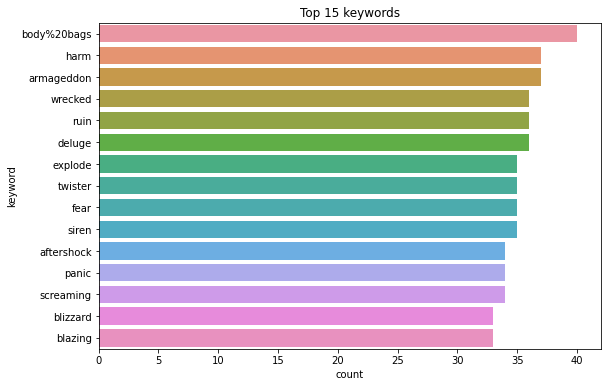

In [25]:
plt.figure(figsize=(9,6))
sns.countplot(y=train_df_val_0.keyword, order = train_df_val_0.keyword.value_counts().iloc[:15].index)
plt.title('Top 15 keywords')
plt.show()

### Most common words of target == 1

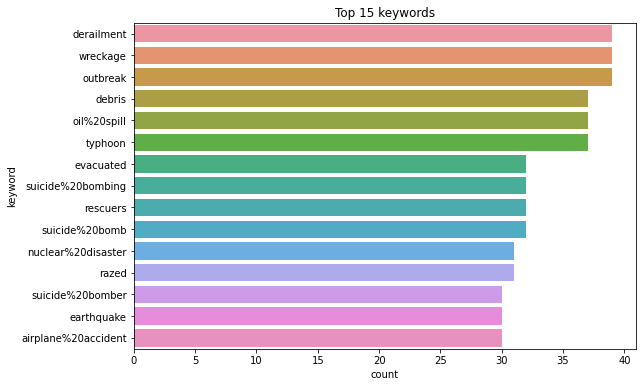

In [26]:
plt.figure(figsize=(9,6))
sns.countplot(y=train_df_val_1.keyword, order = train_df_val_1.keyword.value_counts().iloc[:15].index)
plt.title('Top 15 keywords')
plt.show()

## Perform data cleaning - Remove punctuation from text

In [27]:
import nltk # Natural Language tool kit 
nltk.download('stopwords')
import string 

#mettre en miniscule, enlever les hastags, les numéros, les urls, ponctuations

# You have to download stopwords Package to execute this command
from nltk.corpus import stopwords

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word.lower() for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#### Count Vectorizer

In [28]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cnt_vectorizer = CountVectorizer(analyzer = message_cleaning, dtype = np.uint8)
train_count_vector = cnt_vectorizer.fit_transform(train_df['text'])
test_count_vector = cnt_vectorizer.transform(test_df['text'])

#count_vectorizer = feature_extraction.text.CountVectorizer()
#train_vectors_count = count_vectorizer.fit_transform(train_df["text"])
#test_vectors_count = count_vectorizer.transform(test_df["text"])

In [29]:
X_train_cnt = pd.DataFrame(train_count_vector.toarray())
y_train = train_df['target']
X_test_cnt  = pd.DataFrame(test_count_vector.toarray())

#### TFIDF Vectorizer

In [30]:
tf_vectorizer = TfidfVectorizer(analyzer = message_cleaning, dtype = np.uint8)
train_tf_vector = tf_vectorizer.fit_transform(train_df['text'])
test_tf_vector = tf_vectorizer.transform(test_df['text'])

#tfidf_vectorizer = feature_extraction.text.TfidfVectorizer()
#train_vectors_tfidf = tfidf_vectorizer.fit_transform(train_df["text"])
#test_vectors_tfidf = tfidf_vectorizer.transform(test_df["text"])

/opt/conda/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:2032: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.uint8'> 'dtype' will be converted to np.float64.
  UserWarning,


In [31]:
X_train_tf = pd.DataFrame(train_tf_vector.toarray())
X_test_tf  = pd.DataFrame(test_tf_vector.toarray())

In [32]:
#count_vectorizer = feature_extraction.text.CountVectorizer()
#train_vectors_count = count_vectorizer.fit_transform(train_df["text"])
#test_vectors_count = count_vectorizer.transform(test_df["text"])

In [33]:
#count_vectorizer = feature_extraction.text.CountVectorizer()
#train_vectors_count = count_vectorizer.fit_transform(train_df["text"])
#test_vectors_count = count_vectorizer.transform(test_df["text"])

## Modélisation

### Linear Model

In [34]:
clf = linear_model.RidgeClassifier()

In [35]:
#countvectorizer 
scores = model_selection.cross_val_score(clf, X_train_cnt, y_train, cv=3,scoring="f1")
scores

array([0.60227889, 0.52339332, 0.59670782])

In [36]:
#tfidfvectorize
scores = model_selection.cross_val_score(clf, X_train_tf, y_train, cv=3,scoring="f1")
scores

array([0.61041903, 0.54180239, 0.6459758 ])

### MultinomialNB

In [37]:
mul = MultinomialNB(alpha=1.0)

In [38]:
# countvectorizer
scores = model_selection.cross_val_score(mul, X_train_cnt, y_train, cv=3, scoring="f1")
scores

array([0.66763145, 0.64808989, 0.7122702 ])

In [39]:
#tfidfvectorize
scores = model_selection.cross_val_score(mul, X_train_tf, y_train, cv=3, scoring="f1")
scores

array([0.62557078, 0.58144552, 0.69360614])

In [40]:
mul.fit(X_train_cnt, y_train)

MultinomialNB()

**Submission**

In [41]:
my_submission = test_df[['id']]
my_submission.head()

,id
0,0
1,2
2,3
3,9
4,11


In [42]:
X_test_cnt.shape

(3263, 22564)

In [43]:
val_pred = mul.predict(X_test_cnt)
my_submission["target"] = val_pred

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [44]:
my_submission.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


In [45]:
my_submission.to_csv("submission.csv", index=False)